In [1]:
from spacerocks import SpaceRock, Units

import numpy as np
from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name = 'Ceres'

In [3]:
rock = SpaceRock.from_horizons(name=name)

In [4]:
startdate = Time('2000-01-01', scale='utc', format='iso')
enddate   = Time('2050-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, enddate.jd, 30), scale='utc', format='jd')

/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [5]:
units = Units()
units.timescale = 'utc'
prop, planets, sim = rock.propagate(epochs=testdates.jd, model=2, units=units)

/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 280 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 280 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3080 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [6]:
obs = prop.observe(obscode='W84')

In [12]:
rock_id = name
ephem_Horizons = Horizons(id=rock_id, location='W84',
                          epochs={'start':testdates[0].iso, 
                                  'stop':testdates[-1].iso, 
                                  'step':'30d'}).ephemerides(get_raw_response=True)

In [13]:
Horizons(id=rock_id, location='W84',
                          epochs={'start':testdates[0].iso, 
                                  'stop':testdates[-1].iso, 
                                  'step':'30d'}).ephemerides(get_raw_response=True)

'*******************************************************************************\nJPL/HORIZONS                  1 Ceres (A801 AA)            2021-Sep-16 23:21:09\nRec #:       1 (+COV) Soln.date: 2021-Apr-13_11:04:44   # obs: 1075 (1995-2021)\n \nIAU76/J2000 helio. ecliptic osc. elements (au, days, deg., period=Julian yrs):\n \n  EPOCH=  2458849.5 ! 2020-Jan-01.00 (TDB)         Residual RMS= .24563\n   EC= .07687465013145245  QR= 2.556401146697176   TP= 2458240.1791309435\n   OM= 80.3011901917491    W=  73.80896808746482   IN= 10.59127767086216\n   A= 2.769289292143484    MA= 130.3159688200986   ADIST= 2.982177437589792\n   PER= 4.60851            N= .213870839           ANGMOM= .028541613\n   DAN= 2.69515            DDN= 2.81323            L= 153.8445988\n   B= 10.1666388           MOID= 1.59231997        TP= 2018-May-01.6791309435\n \nAsteroid physical parameters (km, seconds, rotational period in hours):\n   GM= 62.6284             RAD= 469.7              ROTPER= 9.07417\n   H= 3.53

In [8]:
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(obs.ra.deg, obs.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)

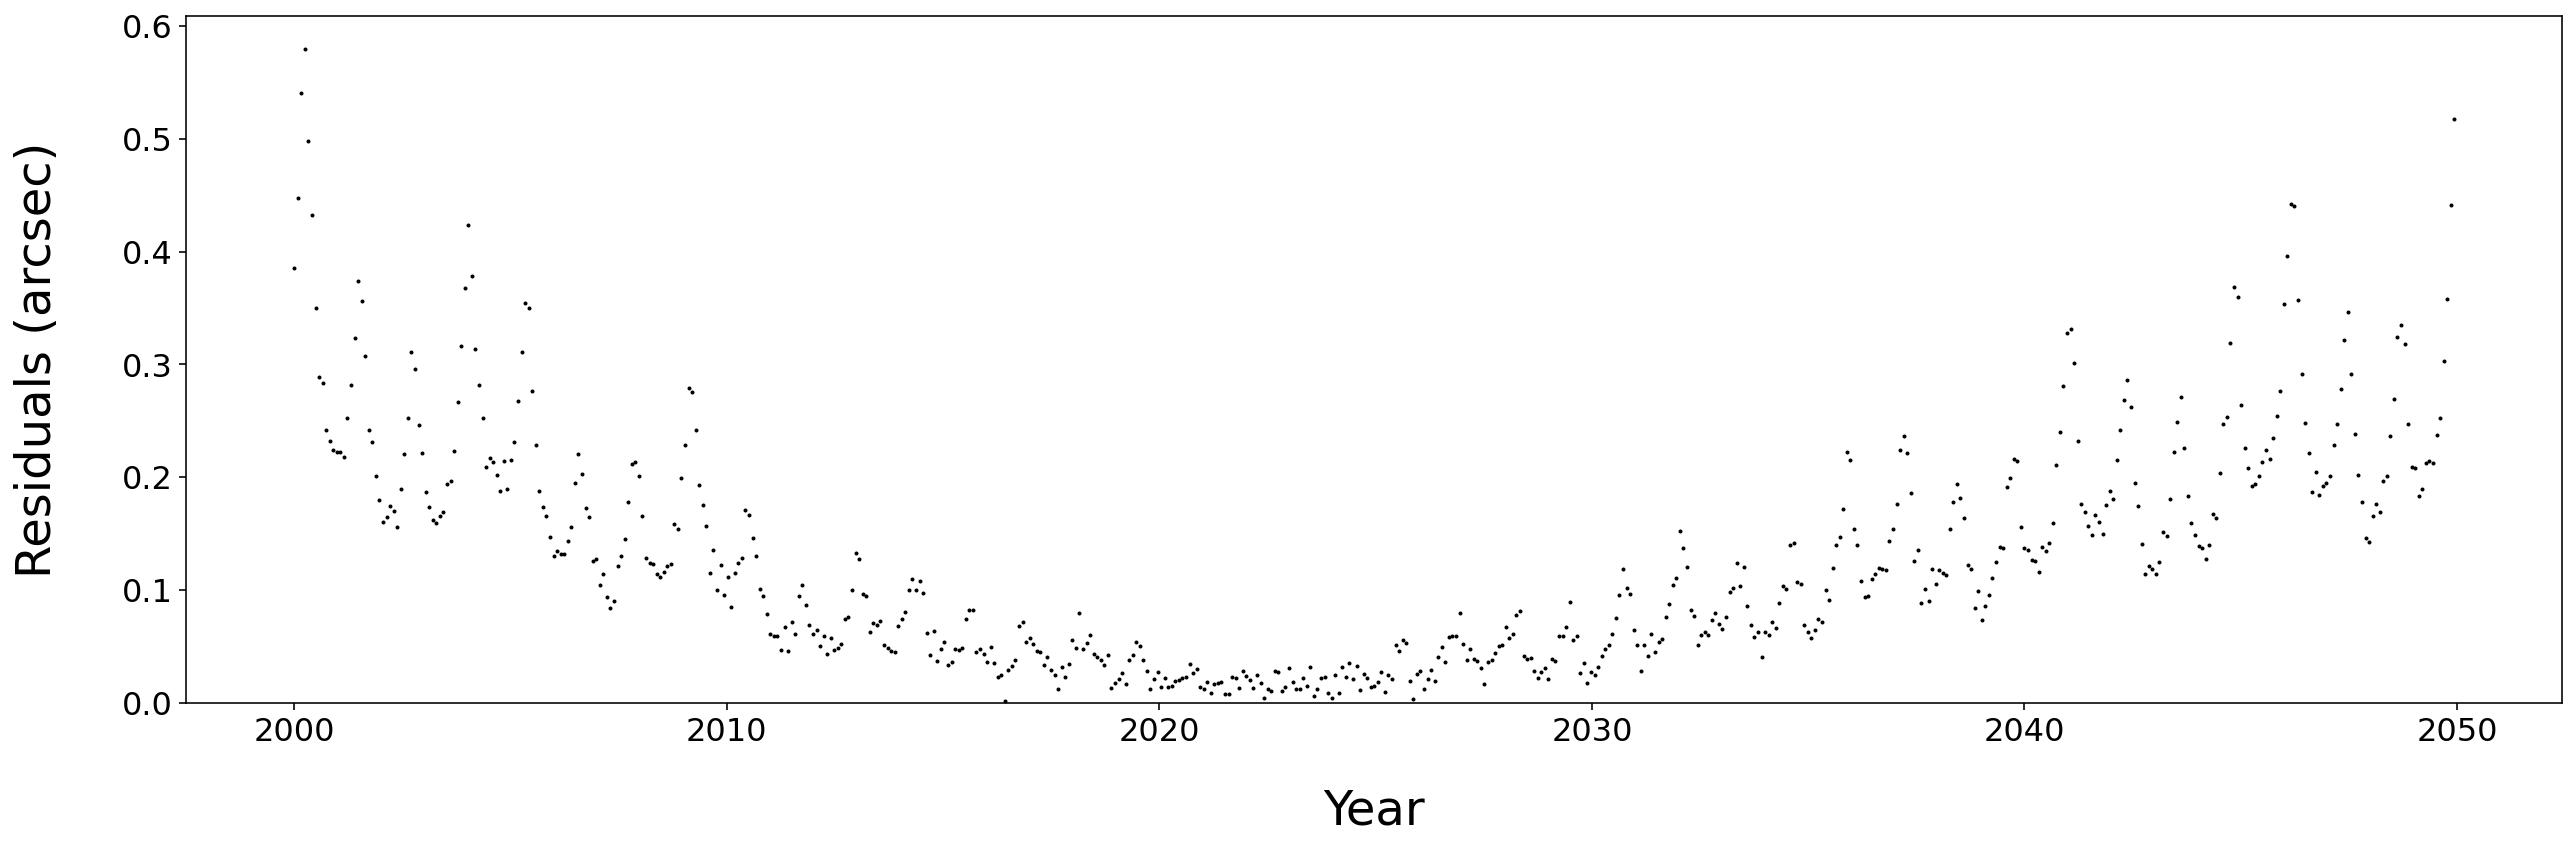

In [9]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.scatter(prop.epoch.decimalyear, sep.arcsec, color='black', s=1)

ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=24, labelpad=20)
ax.set_ylabel('Residuals (arcsec)', fontsize=24, labelpad=30)
ax.set_ylim(bottom=0)
fig.tight_layout()

In [10]:
help(Horizons)

Help on HorizonsClass in module astroquery.jplhorizons.core object:

class HorizonsClass(astroquery.query.BaseQuery)
 |  HorizonsClass(id=None, location=None, epochs=None, id_type='smallbody')
 |  
 |  A class for querying the
 |  `JPL Horizons <https://ssd.jpl.nasa.gov/horizons.cgi>`_ service.
 |  
 |  Method resolution order:
 |      HorizonsClass
 |      astroquery.query.BaseQuery
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id=None, location=None, epochs=None, id_type='smallbody')
 |      Instantiate JPL query.
 |      
 |      Parameters
 |      ----------
 |      id : str, required
 |          Name, number, or designation of the object to be queried
 |      location : str or dict, optional
 |          Observer's location for ephemerides queries or center body
 |          name for orbital element or vector queries. Uses the same
 |          codes as JPL Horizons. If no location is provided, Earth's
 |          center is used for ephemerides querie